In [1]:
import pandas as pd
import logging
import os

# Log fayl joylashuvi
log_path = r"C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Log\trainer.log"

# Log konfiguratsiyasi
os.makedirs(os.path.dirname(log_path), exist_ok=True)
logging.basicConfig(
    filename=log_path,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"  # append mode
)

try:
    logging.info("Feature_Selection.csv faylini o'qish jarayoni boshlandi.")
    df = pd.read_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Data\Feature_Selection\Feature_Selection.csv")
    logging.info(f"Feature_Selection.csv muvaffaqiyatli o'qildi: {df.shape} o'lchamda.")
except FileNotFoundError as e:
    logging.error(f"Fayl topilmadi: {e}")
except Exception as e:
    logging.error(f"Noma’lum xatolik yuz berdi: {e}")


In [21]:
df.head()

,Unnamed: 0,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size,is_large_company
0,0,0.645172,0.585146,0,0.281258,9,0.485419,33,-0.494994,1,-0.139407
1,1,0.645172,0.585146,0,-0.261413,9,-1.907805,33,-0.494994,1,-0.139407
2,2,0.645172,0.585146,0,0.212403,9,0.409431,33,-0.494994,1,-0.139407
3,3,0.645172,0.585146,0,-0.598624,9,NaN,33,-0.494994,1,-0.139407
4,4,0.645172,0.585146,0,NaN,3,NaN,22,-0.494994,1,-0.139407


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer

X = df.drop(columns=["salary"])
y = df["salary"]

# Raqamli ustunlar va kategorik ustunlarni ajratish
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# 1. Raqamli ustunlar uchun median bilan to‘ldirish
imputer_num = SimpleImputer(strategy="median")
X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])

# 2. Kategorik ustunlar uchun eng ko‘p uchraydigan qiymat bilan to‘ldirish (agar mavjud bo‘lsa)
if len(categorical_cols) > 0:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Train-test bo‘lish
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NaN bor-yo‘qligini tekshirish
print("Train set NaN:", X_train.isna().sum().sum())
print("Test set NaN:", X_test.isna().sum().sum())


Train set NaN: 0
Test set NaN: 0


In [24]:
df.head()

,Unnamed: 0,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size,is_large_company
0,0,0.645172,0.585146,0,0.281258,9,0.485419,33,-0.494994,1,-0.139407
1,1,0.645172,0.585146,0,-0.261413,9,-1.907805,33,-0.494994,1,-0.139407
2,2,0.645172,0.585146,0,0.212403,9,0.409431,33,-0.494994,1,-0.139407
3,3,0.645172,0.585146,0,-0.598624,9,NaN,33,-0.494994,1,-0.139407
4,4,0.645172,0.585146,0,NaN,3,NaN,22,-0.494994,1,-0.139407


# Linear Models (Chiziqli modellar)
# LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("LinearRegression")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


LinearRegression
MSE: 0.36522134196218675
MAE: 0.40232677927739363
R2: 0.06888421795732302


# Tree-based Models (Daraxt asosidagi modellar)
# DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("DecisionTreeRegressor")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


DecisionTreeRegressor
MSE: 0.22309374663912682
MAE: 0.17615529722105286
R2: 0.43123228436023775


# Support Vector Models
# SVR

In [28]:
from sklearn.svm import SVR

model = SVR(C=1.0, epsilon=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVR")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


SVR
MSE: 0.4193063415472231
MAE: 0.4023019417688343
R2: -0.06900311473478715


# Ensemble Models
# XGBRegressor

In [29]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBRegressor")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


XGBRegressor
MSE: 0.13605253544577908
MAE: 0.1486082154497184
R2: 0.6531400321244054


# K-Nearest Neighbors
# KNeighborsRegressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("KNeighborsRegressor")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


KNeighborsRegressor
MSE: 0.42022423149665666
MAE: 0.44898162965425575
R2: -0.07134323487536887


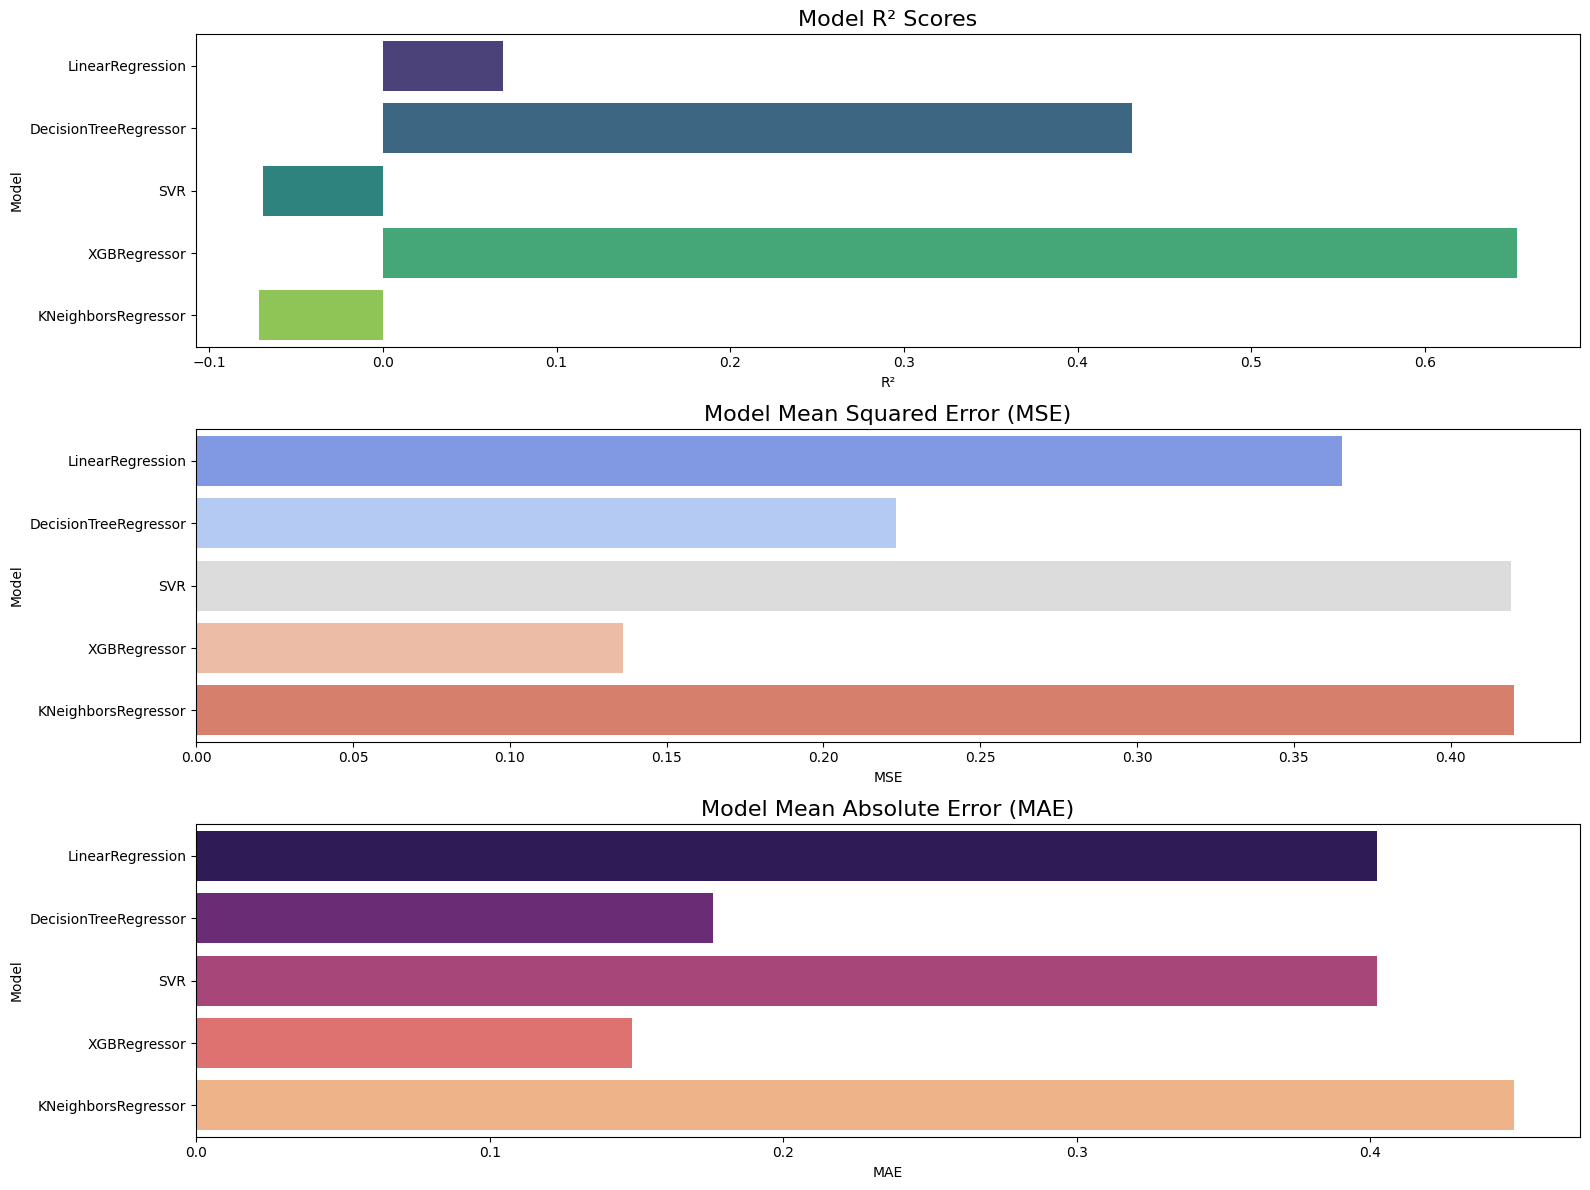


📋 Modellar Natijalari:


,Model,MSE,MAE,R2
0,LinearRegression,0.365221,0.402327,0.068884
1,DecisionTreeRegressor,0.223094,0.176155,0.431232
2,SVR,0.419306,0.402302,-0.069003
3,XGBRegressor,0.136053,0.148608,0.653140
4,KNeighborsRegressor,0.420224,0.448982,-0.071343


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Natijalarni DataFramega joylash
results_df = pd.DataFrame({
    "Model": ["LinearRegression", "DecisionTreeRegressor", "SVR", "XGBRegressor", "KNeighborsRegressor"],
    "MSE": [0.36522134196218675, 0.22309374663912682, 0.4193063415472231, 0.13605253544577908, 0.42022423149665666],
    "MAE": [0.40232677927739363, 0.17615529722105286, 0.4023019417688343, 0.1486082154497184, 0.44898162965425575],
    "R2": [0.06888421795732302, 0.43123228436023775, -0.06900311473478715, 0.6531400321244054, -0.07134323487536887]
})

# Grafik o'lchamlari
plt.figure(figsize=(16, 12))

# 1. R² bar chart
plt.subplot(3, 1, 1)
sns.barplot(x="R2", y="Model", data=results_df, palette="viridis")
plt.title("Model R² Scores", fontsize=16)
plt.xlabel("R²")
plt.ylabel("Model")

# 2. MSE bar chart
plt.subplot(3, 1, 2)
sns.barplot(x="MSE", y="Model", data=results_df, palette="coolwarm")
plt.title("Model Mean Squared Error (MSE)", fontsize=16)
plt.xlabel("MSE")
plt.ylabel("Model")

# 3. MAE bar chart
plt.subplot(3, 1, 3)
sns.barplot(x="MAE", y="Model", data=results_df, palette="magma")
plt.title("Model Mean Absolute Error (MAE)", fontsize=16)
plt.xlabel("MAE")
plt.ylabel("Model")

plt.tight_layout()
plt.show()

# Jadval ko'rinishi
print("\n📋 Modellar Natijalari:")
display(results_df)


## 📊 Tahlil

- **R²** balining yuqoriroq bo‘lishi modelning yaxshiroq tushuntirish quvvatiga ega ekanligini ko‘rsatadi.  
- **MSE** (Mean Squared Error) va **MAE** (Mean Absolute Error) past bo‘lishi modelning aniqroq ekanini bildiradi.  

### Eng yaxshi natijalar:
- **XGBRegressor** modeli:  
  - **R² = 0.653** → ya’ni model ma’lumotlarning ~65% variance’ini tushuntiradi.  
  - **MSE = 0.136** → eng kichik xato.  
  - **MAE = 0.148** → eng past o‘rtacha xato.

✅ **Xulosa:** Eng yaxshi model — **XGBRegressor**.  
Bu modelning yuqori R² va past xato ko‘rsatkichlari uni eng samarali qiladi.


# Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np

# XGBRegressor tanlab olinadi
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print("Cross-validation R² scores:", cv_scores)
print("O'rtacha R²:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-validation R² scores: [0.6203965  0.69156172 0.6295734  0.63116171 0.5832743 ]
O'rtacha R²: 0.6311935260082413
Standard deviation: 0.034813135904580066



📋 R² Natijalar:


,Model,R2
0,Test Set,0.653140
1,Cross-Validation,0.631194


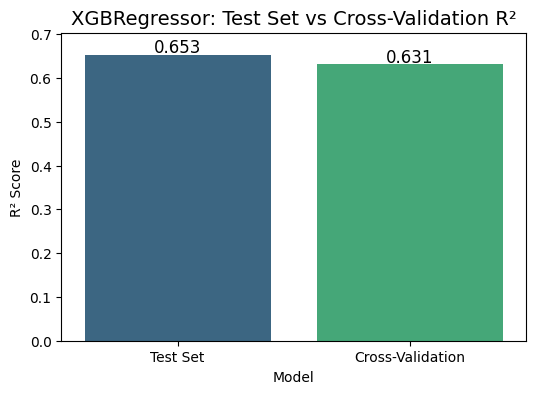

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Natijalarni yaratish
r2_results = pd.DataFrame({
    "Model": ["Test Set", "Cross-Validation"],
    "R2": [0.653140, 0.631194]
})

# Jadval ko‘rinishi
print("\n📋 R² Natijalar:")
display(r2_results)

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="R2", data=r2_results, palette="viridis")

# Annotatsiya qo‘shish
for i, v in enumerate(r2_results["R2"]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=12)

plt.title("XGBRegressor: Test Set vs Cross-Validation R²", fontsize=14)
plt.ylim(0, max(r2_results["R2"]) + 0.05)
plt.ylabel("R² Score")
plt.show()


In [35]:
import xgboost as xgb
import joblib
import os

# Model yaratish
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Modelni o‘rgatish
model.fit(X_train, y_train)

# Saqlash manzili
model_path = r"C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Models\xgb_model.pkl"

# Agar papka mavjud bo‘lmasa, yaratish
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Modelni saqlash
joblib.dump(model, model_path)
print(f"✅ XGBRegressor modeli '{model_path}' fayliga saqlandi.")


✅ XGBRegressor modeli 'C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Models\xgb_model.pkl' fayliga saqlandi.
